<a href="https://colab.research.google.com/github/Nandan0402/study-hours-score-ml/blob/main/Marks_vs_Study_Hours_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
data = pd.read_csv("w-data.csv")

print("First 5 rows:")
print(data.head())
print("\nShape:", data.shape)
print("\nInfo:")
print(data.info())

First 5 rows:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Shape: (20, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   20 non-null     float64
 1   Scores  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 452.0 bytes
None


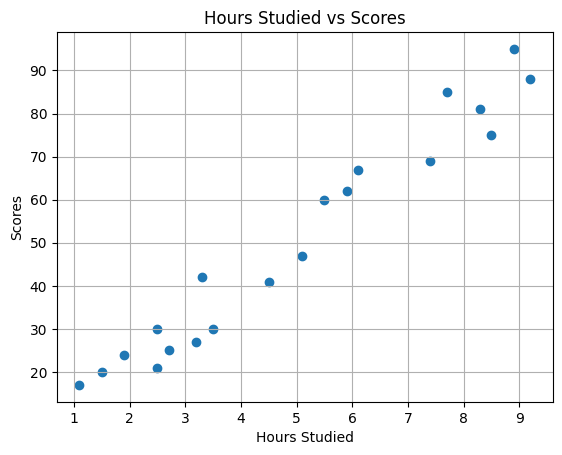

In [5]:
plt.figure()
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Hours Studied vs Scores")
plt.grid(True)
plt.show()

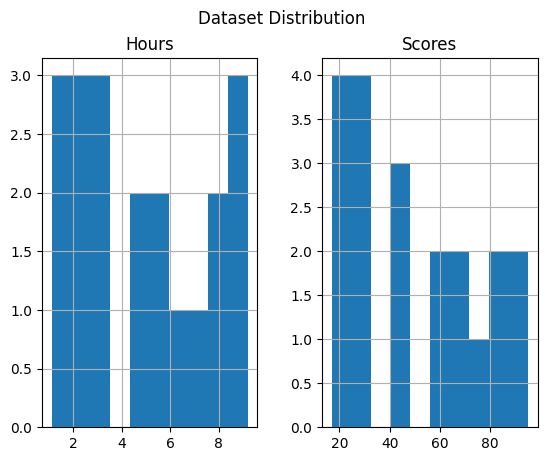

In [6]:
data.hist(bins=10)
plt.suptitle("Dataset Distribution")
plt.show()

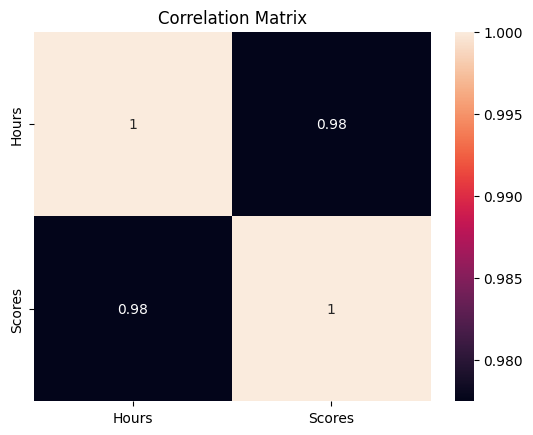

In [7]:
plt.figure()
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

In [8]:
X = data[['Hours']]
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

print("\nSlope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)



Slope (m): 9.197887718748305
Intercept (c): 4.680680222078891


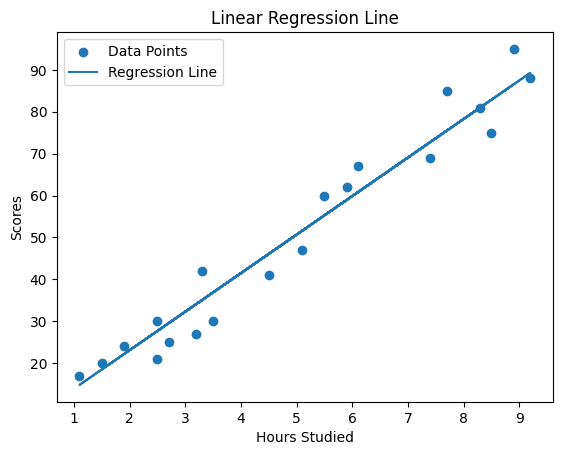

In [10]:
line = model.coef_ * X + model.intercept_

plt.figure()
plt.scatter(X, y, label="Data Points")
plt.plot(X, line, label="Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Linear Regression Line")
plt.legend()
plt.show()


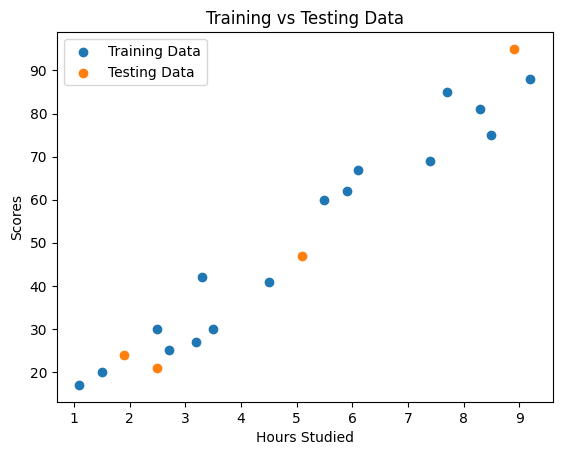

In [11]:
plt.figure()
plt.scatter(X_train, y_train, label="Training Data")
plt.scatter(X_test, y_test, label="Testing Data")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.title("Training vs Testing Data")
plt.legend()
plt.show()

In [12]:
y_pred = model.predict(X_test)

results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})


In [13]:
print("\nActual vs Predicted:")
print(results)


Actual vs Predicted:
   Actual  Predicted
0      21  27.675400
1      24  22.156667
2      95  86.541881
3      47  51.589908


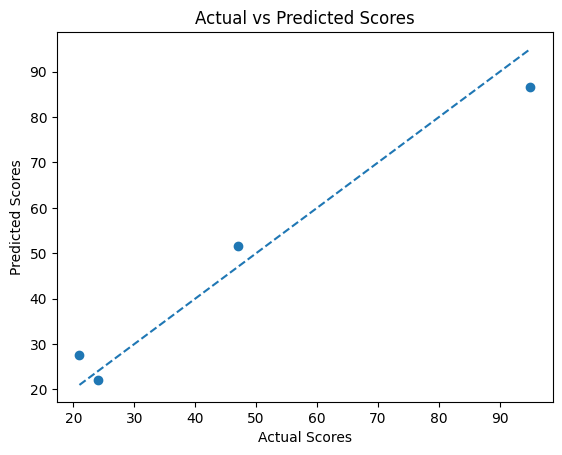

In [14]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--'
)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.show()


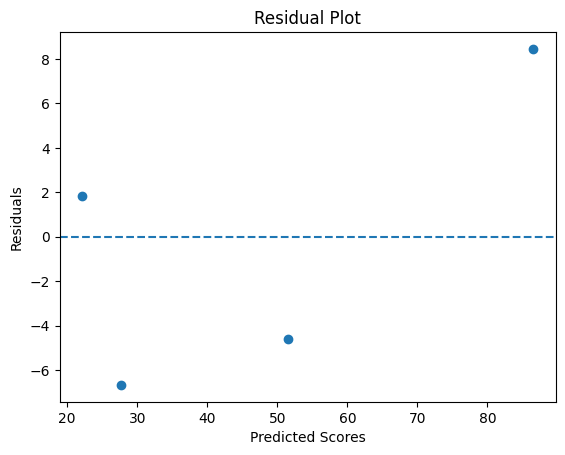

In [15]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)



Model Evaluation:
MSE : 35.141466438371516
RMSE: 5.92802382235189
MAE : 5.391689825001353
R2  : 0.9599384778757432


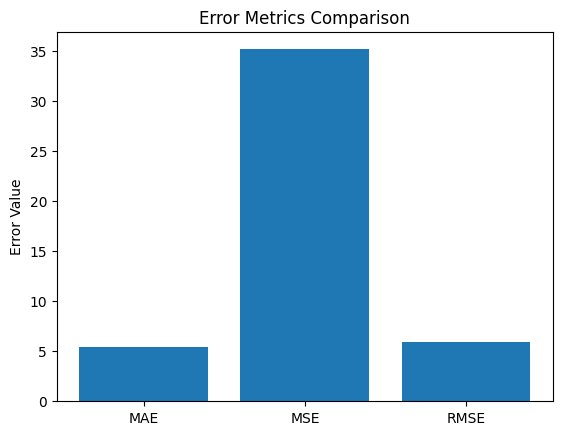

In [17]:
errors = [mae, mse, rmse]
labels = ["MAE", "MSE", "RMSE"]

plt.figure()
plt.bar(labels, errors)
plt.title("Error Metrics Comparison")
plt.ylabel("Error Value")
plt.show()

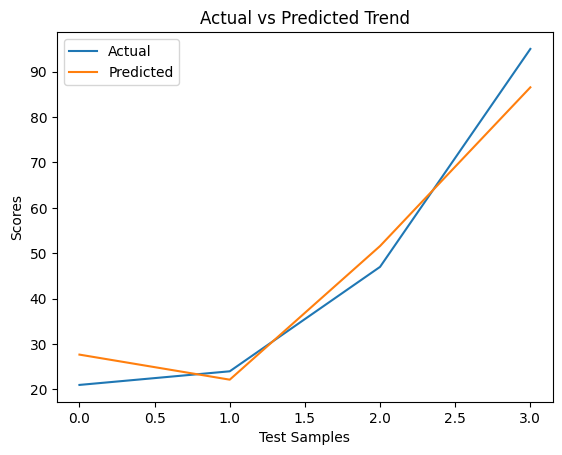

In [18]:
sorted_index = np.argsort(y_test.values)

plt.figure()
plt.plot(y_test.values[sorted_index], label="Actual")
plt.plot(y_pred[sorted_index], label="Predicted")
plt.xlabel("Test Samples")
plt.ylabel("Scores")
plt.title("Actual vs Predicted Trend")
plt.legend()
plt.show()


In [19]:
hours = np.array([[9.25]])
predicted_score = model.predict(hours)
print("\nPredicted score for 9.25 hours:", predicted_score[0])


Predicted score for 9.25 hours: 89.76114162050071


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
results.to_csv("prediction_results.csv", index=False)
print("\nPrediction results saved to prediction_results.csv")


Prediction results saved to prediction_results.csv
